In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
fileHeader = pd.read_csv('header.txt', sep='\t', header=None)
fileHeader.values.tolist()[0]

['Seq',
 'Description',
 'Max Score',
 'Total Score',
 'Query Cover',
 'E value',
 'Per. Ident',
 'Accession']

In [3]:
NtPr_Df = pd.DataFrame()
All_Df = pd.DataFrame()
Nt_Df = pd.DataFrame()

In [4]:
txtFilesPath = "./txt files/"
fileList = os.listdir(txtFilesPath)
len(fileList)

36

In [5]:
for file in os.listdir(txtFilesPath): # proteins
    print(file)
    df = pd.read_csv(txtFilesPath+file, sep='\t', names=fileHeader.values.tolist()[0])

    df['Per. Ident']=df['Per. Ident'].str.rstrip('%').astype('float') 
    df['Query Cover']=df['Query Cover'].str.rstrip('%').astype('float') 
    df['E value']=df['E value']

    df['Description'][df['Description'].str.contains("Severe acute respiratory syndrome coronavirus 2")]="Covid-19"
    df['Description'][df['Description'].str.contains("pneumonia")]="pneumonia viral"
    df['Description'][df['Description'].str.contains("Bat")]="Betacoronaviruses"
    df['Description'][df['Description'].str.contains("bat")]="Betacoronaviruses"
    df['Description'][df['Description'].str.contains("BetaCoV")]="Betacoronaviruses"
    df['Description'][df['Description'].str.contains("SARS coronavirus")]="SARS-CoV"
    df['Description'][df['Description'].str.contains("SARS Coronavirus")]="SARS-CoV"
    df['Description'][df['Description'].str.contains("Severe acute respiratory")]="SARS-CoV"
    
    
    df['Description'][df['Description'].str.contains("BtRs-BetaCoV")]="Betacoronaviruses"
    
    df['Protein'] = file.rstrip('.txt')
    All_Df = All_Df.append(df)
#     All_Df.names = ['Nucleotide', 'Per. Ident']
    
    for desc in df.Description.unique(): # Nucleotides
        count = np.count_nonzero(df['Per. Ident'][df['Description'].str.contains(desc)])
        
        meanPI = np.mean(df['Per. Ident'][df['Description'].str.contains(desc)])
        stdPI = np.std(df['Per. Ident'][df['Description'].str.contains(desc)])
        
        meanQC = np.mean(df['Query Cover'][df['Description'].str.contains(desc)])
        stdQC = np.std(df['Query Cover'][df['Description'].str.contains(desc)])
        
        meanEV = np.mean(df['E value'][df['Description'].str.contains(desc)])
        stdEV = np.std(df['E value'][df['Description'].str.contains(desc)])
        
        
        tmpData = [[desc, file.rstrip('.txt'), count, meanQC, stdQC, meanEV, stdEV, meanPI, stdPI] ]
        NtPr_Df = NtPr_Df.append(pd.DataFrame(tmpData
                                , columns = ['Nucleotide', 'Protein', 'count','mean Query Cover','std Query Cover', 'mean E value','std E value', 'mean Per. Ident','std Per. Ident', ])
                          , ignore_index=True)

        
NtPr_Df = NtPr_Df.sort_values(by=['count', 'mean Per. Ident',  'Nucleotide', 'Protein'], ascending=False)
NtPr_Df

2'-O-ribose methyltransferase.txt
3' -to-5' exonuclease.txt


C:\Users\ANP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\ANP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ANP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by I

3C-like proteinase.txt
endoRNAse.txt
envelope protein.txt
helicase.txt
leader protein.txt
matrix protein.txt
memberane glycoprotein.txt
memberane protein.txt
nanstructural protein NS3.txt
nonstructural protein NS6.txt
nonstructural protein Ns7a.txt
nonstructural protein NS7b.txt
nonstructural protein NS8.txt
nsp10.txt
nsp2.txt
nsp3.txt
nsp4.txt
nsp6.txt
nsp7.txt
nsp8.txt
nsp9.txt
nucleocapsid phosphoprotein.txt
orf10 protein.txt
orf1a.txt
ORF3a protein.txt
ORF3a.txt
orf6 protein.txt
ORF7a protein.txt
ORF8 protein.txt
orfab.txt
RNA-dependent RNA polymeras.txt
spike glycoprotein.txt
structural protein.txt
surface glycoprotein.txt


,Nucleotide,Protein,count,mean Query Cover,std Query Cover,mean E value,std E value,mean Per. Ident,std Per. Ident
24,SARS-CoV,helicase,56,100.000000,0.000000,0.000000e+00,0.000000e+00,99.824286,2.969230e-02
118,Covid-19,nucleocapsid phosphoprotein,52,99.980769,0.137335,2.442310e-74,1.292184e-74,100.000000,0.000000e+00
102,Betacoronaviruses,nsp7,52,100.000000,0.000000,4.326923e-27,5.791623e-28,68.646923,1.648022e-01
93,Betacoronaviruses,nsp4,51,100.000000,0.000000,0.000000e+00,0.000000e+00,79.874510,3.758590e+00
112,SARS-CoV,nsp8,50,100.000000,0.000000,3.980000e-100,1.400000e-101,82.320000,5.684342e-14
...,...,...,...,...,...,...,...,...,...
74,"SARS-like coronavirus WIV16, complete genome",nonstructural protein NS8,1,100.000000,0.000000,2.000000e-43,0.000000e+00,57.850000,0.000000e+00
165,"SARS-like coronavirus WIV16, complete genome",ORF8 protein,1,100.000000,0.000000,7.000000e-44,0.000000e+00,57.850000,0.000000e+00
73,Rhinolophus affinis coronavirus isolate LYRa11...,nonstructural protein NS8,1,100.000000,0.000000,1.000000e-45,0.000000e+00,57.850000,0.000000e+00
164,Rhinolophus affinis coronavirus isolate LYRa11...,ORF8 protein,1,100.000000,0.000000,3.000000e-46,0.000000e+00,57.850000,0.000000e+00


In [6]:
All_Df.columns

Index(['Seq', 'Description', 'Max Score', 'Total Score', 'Query Cover',
       'E value', 'Per. Ident', 'Accession', 'Protein'],
      dtype='object')

In [7]:
All_Df = All_Df[['Seq', 'Description', 'Protein', 'Max Score', 'Total Score', 'Query Cover', 'E value', 'Per. Ident', 'Accession']]
All_Df = All_Df.rename(columns={'Description':'Nucleotide'})
All_Df

,Seq,Nucleotide,Protein,Max Score,Total Score,Query Cover,E value,Per. Ident,Accession
0,Select seq MT106053.1,Covid-19,2'-O-ribose methyltransferase,625.0,625.0,100.0,0.0,100.00,MT106054.1
1,Select seq MT106053.1,Covid-19,2'-O-ribose methyltransferase,625.0,625.0,100.0,0.0,100.00,MT106053.1
2,Select seq MT106052.1,Covid-19,2'-O-ribose methyltransferase,625.0,625.0,100.0,0.0,100.00,MT106052.1
3,Select seq MT093631.1,Covid-19,2'-O-ribose methyltransferase,625.0,625.0,100.0,0.0,100.00,MT093631.1
4,Select seq MT093571.1,Covid-19,2'-O-ribose methyltransferase,625.0,625.0,100.0,0.0,100.00,MT093571.1
...,...,...,...,...,...,...,...,...,...
95,Select seq AY394977.1,SARS-CoV,surface glycoprotein,1977.0,1977.0,98.0,0.0,75.44,AY394977.1
96,Select seq AY545919.1,SARS-CoV,surface glycoprotein,1977.0,1977.0,98.0,0.0,75.44,AY545919.1
97,Select seq FJ882941.1,SARS-CoV,surface glycoprotein,1977.0,1977.0,98.0,0.0,75.36,FJ882941.1
98,Select seq AY278490.3,SARS-CoV,surface glycoprotein,1977.0,1977.0,98.0,0.0,75.52,AY278490.3


In [8]:
All_Df.Nucleotide.unique()

array(['Covid-19', 'pneumonia viral', 'Betacoronaviruses',
       'Pangolin coronavirus isolate MP789 genomic sequence', 'SARS-CoV',
       'SARS-like coronavirus WIV16, complete genome',
       'Rhinolophus affinis coronavirus isolate LYRa11, complete genome'],
      dtype=object)

In [9]:
Nt_Df = pd.DataFrame()
for desc in All_Df.Nucleotide.unique():
    count = np.count_nonzero(All_Df['Per. Ident'][All_Df['Nucleotide'].str.contains(desc)])

    meanPI = np.mean(All_Df['Per. Ident'][All_Df['Nucleotide'].str.contains(desc)])
    stdPI = np.std(All_Df['Per. Ident'][All_Df['Nucleotide'].str.contains(desc)])

    meanQC = np.mean(All_Df['Query Cover'][All_Df['Nucleotide'].str.contains(desc)])
    stdQC = np.std(All_Df['Query Cover'][All_Df['Nucleotide'].str.contains(desc)])

    meanEV = np.mean(All_Df['E value'][All_Df['Nucleotide'].str.contains(desc)])
    stdEV = np.std(All_Df['E value'][All_Df['Nucleotide'].str.contains(desc)])


    tmpData = [[desc, count, meanQC, stdQC, meanEV, stdEV, meanPI, stdPI] ]
    Nt_Df = Nt_Df.append(pd.DataFrame(tmpData
                                      , columns = ['Nucleotide','count','mean Query Cover','std Query Cover', 'mean E value','std E value', 'mean Per. Ident','std Per. Ident', ])
                         , ignore_index=True)

    Nt_Df = Nt_Df.sort_values(by=['count', 'mean Per. Ident',  'Nucleotide'], ascending=False)
Nt_Df

,Nucleotide,count,mean Query Cover,std Query Cover,mean E value,std E value,mean Per. Ident,std Per. Ident
0,Covid-19,1485,99.915825,0.277650,3.589226e-02,2.130063e-01,95.048815,10.772555
1,SARS-CoV,1033,99.102614,2.431864,4.646679e-07,4.263463e-06,82.889477,11.999464
2,Betacoronaviruses,815,99.628221,1.589209,7.361968e-08,1.564790e-06,80.343742,12.910249
3,pneumonia viral,163,99.760736,1.355898,3.987730e-02,2.241658e-01,94.986687,11.080024
4,Pangolin coronavirus isolate MP789 genomic seq...,22,99.909091,0.287480,7.272727e-02,3.332782e-01,91.185455,11.945348
5,"SARS-like coronavirus WIV16, complete genome",17,99.764706,0.644379,3.529414e-22,9.665691e-22,75.084118,9.000554
6,Rhinolophus affinis coronavirus isolate LYRa11...,12,99.916667,0.276385,3.333333e-12,1.105542e-11,73.270000,9.777195


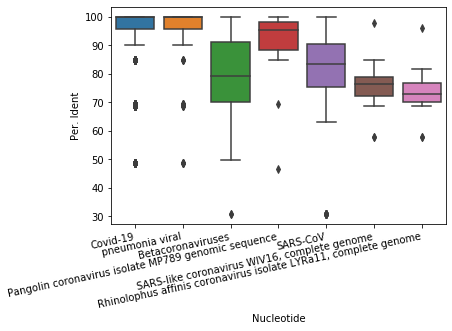

In [10]:
pdfName = 'Percent_Identity.pdf'
pdf = PdfPages(pdfName)
# plt.figure(figsize=(11,8.5))

ax = sns.boxplot(x="Nucleotide", y="Per. Ident", data=All_Df)
ax.set_xticklabels(ax.get_xticklabels(), 
                   horizontalalignment='right',
                   rotation=12)
pdf.savefig(ax.figure, bbox_inches='tight')
pdf.close()


[Text(0, 0, 'Covid-19'),
 Text(0, 0, 'pneumonia viral'),
 Text(0, 0, 'Betacoronaviruses'),
 Text(0, 0, 'Pangolin coronavirus isolate MP789 genomic sequence'),
 Text(0, 0, 'SARS-CoV'),
 Text(0, 0, 'SARS-like coronavirus WIV16, complete genome'),
 Text(0, 0, 'Rhinolophus affinis coronavirus isolate LYRa11, complete genome')]

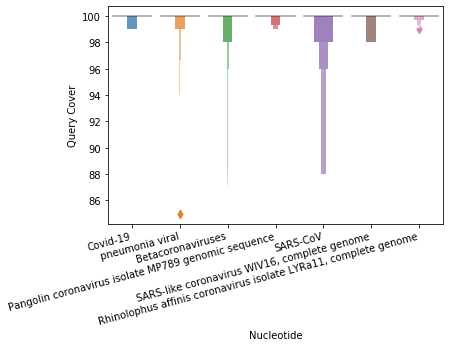

In [11]:
ax = sns.boxenplot(x="Nucleotide", y="Query Cover", data=All_Df)
ax.set_xticklabels(ax.get_xticklabels(), 
                   horizontalalignment='right',
                   rotation=15)

[Text(0, 0, 'Covid-19'),
 Text(0, 0, 'pneumonia viral'),
 Text(0, 0, 'Betacoronaviruses'),
 Text(0, 0, 'Pangolin coronavirus isolate MP789 genomic sequence'),
 Text(0, 0, 'SARS-CoV'),
 Text(0, 0, 'SARS-like coronavirus WIV16, complete genome'),
 Text(0, 0, 'Rhinolophus affinis coronavirus isolate LYRa11, complete genome')]

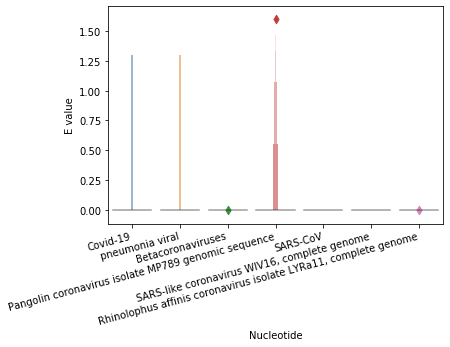

In [12]:
ax = sns.boxenplot(x="Nucleotide", y="E value", data=All_Df)
ax.set_xticklabels(ax.get_xticklabels(), 
                   horizontalalignment='right',
                   rotation=15)